# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shingu
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | tejen
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | horta
Processing Record 12 of Set 1 | happy valley-goose bay
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | usogorsk
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | sur
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | horsham
Proce

City not found. Skipping...
Processing Record 42 of Set 4 | miri
Processing Record 43 of Set 4 | aqaba
Processing Record 44 of Set 4 | tagab
Processing Record 45 of Set 4 | sarandi del yi
Processing Record 46 of Set 4 | brokopondo
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | varzea da palma
Processing Record 0 of Set 5 | monaghan
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | namdrik
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | pizarro
Processing Record 5 of Set 5 | kingston
Processing Record 6 of Set 5 | iquique
Processing Record 7 of Set 5 | kataragama
City not found. Skipping...
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | badagry
Processing Record 10 of Set 5 | alpena
Processing Record 11 of Set 5 | polyarnyy
Processing Record 12 of Set 5 | sitangkai
Processing Record 13 of Set 5 | bandon
Processing Record 14 of Set 5 | belyye berega
P

Processing Record 34 of Set 8 | ar ruseris
Processing Record 35 of Set 8 | goz beida
Processing Record 36 of Set 8 | bereznik
Processing Record 37 of Set 8 | santana
Processing Record 38 of Set 8 | kotli
Processing Record 39 of Set 8 | mukalla
Processing Record 40 of Set 8 | altai
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | rapid city
Processing Record 43 of Set 8 | chilliwack
Processing Record 44 of Set 8 | ust'-ilimsk
Processing Record 45 of Set 8 | grand baie
Processing Record 46 of Set 8 | marhaura
Processing Record 47 of Set 8 | juneau
Processing Record 48 of Set 8 | shubarkuduk
Processing Record 49 of Set 8 | bintulu
Processing Record 0 of Set 9 | trat
Processing Record 1 of Set 9 | chaman
Processing Record 2 of Set 9 | dudinka
Processing Record 3 of Set 9 | worland
Processing Record 4 of Set 9 | zaragoza
Processing Record 5 of Set 9 | angaur state
Processing Record 6 of Set 9 | la junta
Processing Record 7 of Set 9 | callao
Processing Record 8 of S

Processing Record 26 of Set 12 | castillos
Processing Record 27 of Set 12 | dhanwar
Processing Record 28 of Set 12 | bezdead
Processing Record 29 of Set 12 | utica
Processing Record 30 of Set 12 | poronaysk
Processing Record 31 of Set 12 | san luis de la loma
Processing Record 32 of Set 12 | margate
Processing Record 33 of Set 12 | revda
Processing Record 34 of Set 12 | chhatarpur
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shingu,33.7333,135.9833,27.22,78,2,0.43,JP,1726180581
1,grytviken,-54.2811,-36.5092,-0.06,85,54,5.56,GS,1726180582
2,bredasdorp,-34.5322,20.0403,9.38,92,98,2.15,ZA,1726180583
3,albany,42.6001,-73.9662,22.59,69,13,0.95,US,1726180501
4,isafjordur,66.0755,-23.1240,2.25,81,42,2.18,IS,1726180586


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shingu,33.7333,135.9833,27.22,78,2,0.43,JP,1726180581
1,grytviken,-54.2811,-36.5092,-0.06,85,54,5.56,GS,1726180582
2,bredasdorp,-34.5322,20.0403,9.38,92,98,2.15,ZA,1726180583
3,albany,42.6001,-73.9662,22.59,69,13,0.95,US,1726180501
4,isafjordur,66.0755,-23.1240,2.25,81,42,2.18,IS,1726180586


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

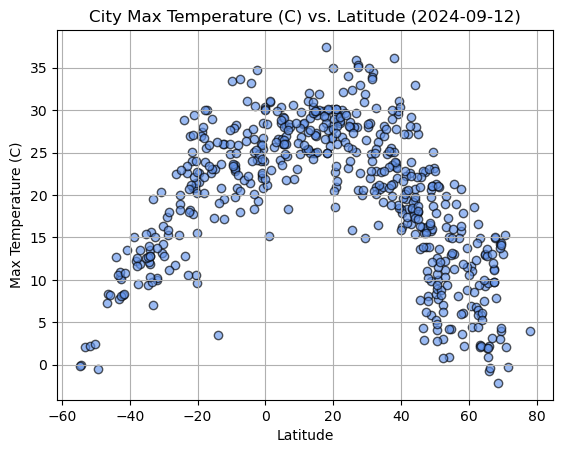

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="cornflowerblue", 
            edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("City Max Temperature (C) vs. Latitude (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

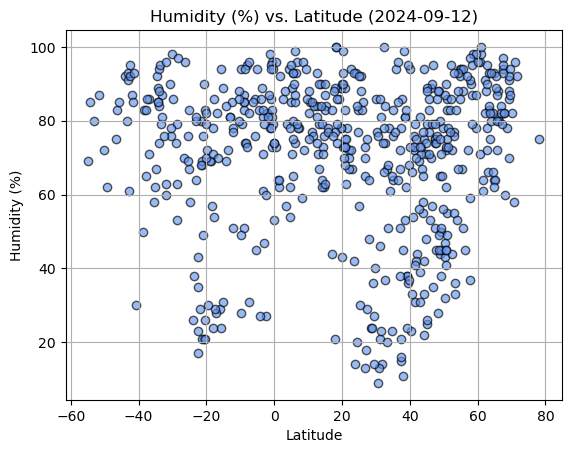

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="cornflowerblue", 
            edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

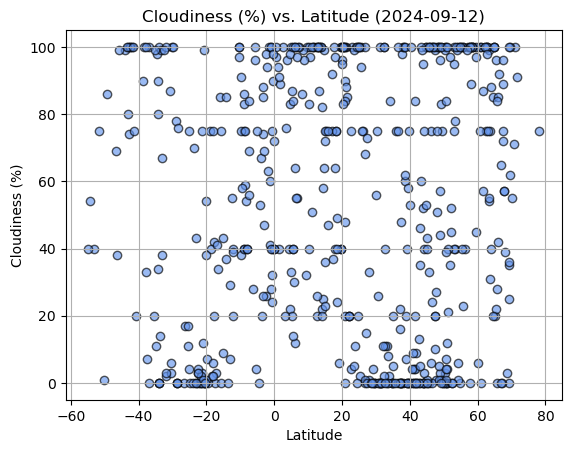

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="cornflowerblue", 
            edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

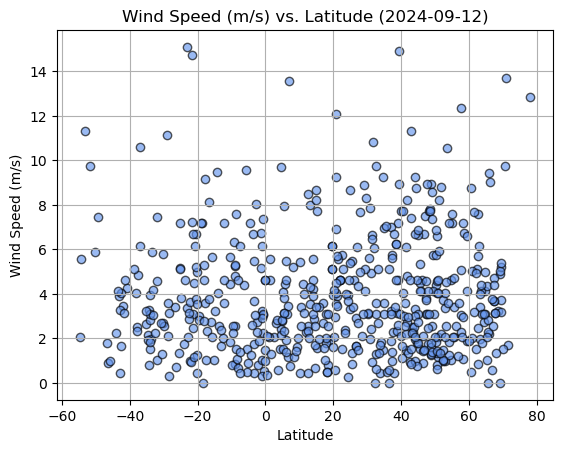

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="cornflowerblue", 
            edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("Wind Speed (m/s) vs. Latitude (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots for anything that is the same for each graph
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    print(f"The r^2-value is: {rvalue**2}")
    
    # Store regress_values to call function later
    return regress_values

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shingu,33.7333,135.9833,27.22,78,2,0.43,JP,1726180581
3,albany,42.6001,-73.9662,22.59,69,13,0.95,US,1726180501
4,isafjordur,66.0755,-23.1240,2.25,81,42,2.18,IS,1726180586
6,wailua homesteads,22.0669,-159.3780,28.44,72,20,4.63,US,1726180588
7,badger,64.8000,-147.5333,12.95,64,100,4.12,US,1726180589


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-0.06,85,54,5.56,GS,1726180582
2,bredasdorp,-34.5322,20.0403,9.38,92,98,2.15,ZA,1726180583
5,port-aux-francais,-49.3500,70.2167,-0.51,62,86,7.45,TF,1726180587
12,edinburgh of the seven seas,-37.0676,-12.3116,13.55,86,100,10.59,SH,1726180595
15,waitangi,-43.9535,-176.5597,12.68,92,99,2.24,NZ,1726180598


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5994956514552766


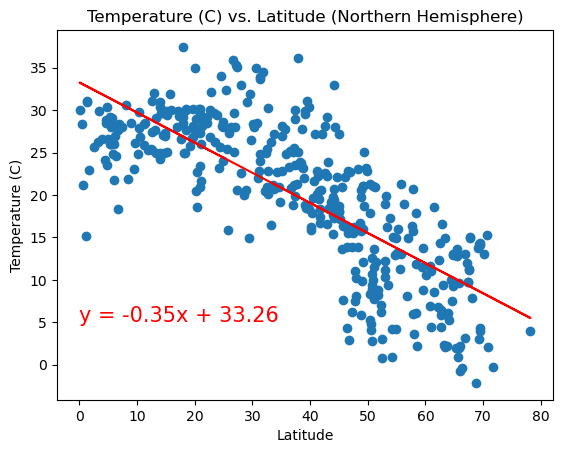

In [30]:
# Linear regression on Northern Hemisphere

# Define variables 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Temperature (C) vs. Latitude (Northern Hemisphere)")
plt.ylabel("Temperature (C)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0, 5), fontsize=15,color="red")

# Display graph
plt.show()

The r^2-value is: 0.6533840504468387


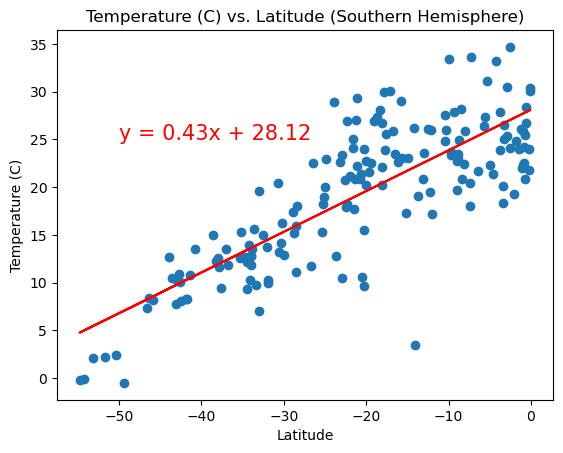

In [31]:
# Linear regression on Southern Hemisphere

# Define variables 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Temperature (C) vs. Latitude (Southern Hemisphere)")
plt.ylabel("Temperature (C)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,25), fontsize=15,color="red")

# Display graph
plt.show()

**Discussion about the linear relationship:** The linear relationship between Temperature and Latitude, as outlined by the graphs above, show that as latitude moves closer to 0 (the equator), temperature increases. This is illustrated by a negative slope in the Northern Hemisphere graph and a positive slope in the Southern Hemisphere graph. Rounded, the r-squared value for both the Northern and Southern Hemisphere are about .6 and .7, respectively, which shows a moderate correlation between Temperature and Latitude. There is only some predictive power in the relationship between Latitude and Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00016455020857441164


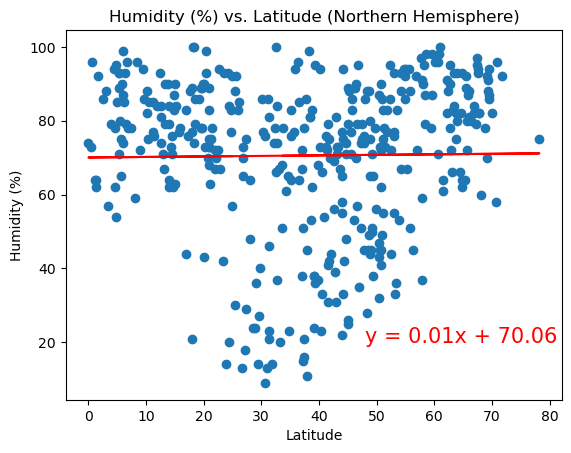

In [36]:
# Northern Hemisphere

# Define variables 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Humidity (%) vs. Latitude (Northern Hemisphere)")
plt.ylabel("Humidity (%)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (48,20), fontsize=15,color="red")

# Display graph
plt.show()

The r^2-value is: 0.004278003637195077


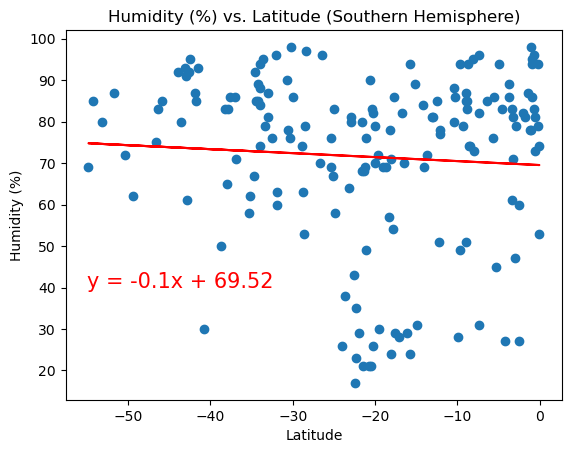

In [37]:
# Southern Hemisphere

# Define variables 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Humidity (%) vs. Latitude (Southern Hemisphere)")
plt.ylabel("Humidity (%)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,40), fontsize=15,color="red")

# Display graph
plt.show()

**Discussion about the linear relationship:** There is not a significant correlation between Humidity and Latitude, as displayed by the two graphs above. The r-squared value for both the Northern and Southern Hemispheres are very close to 0, demonstrating that there is a very weak relationship between the two, and that it will be unreliable to try to predict humidity when evaluating the latitude of a city. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0033342238594152884


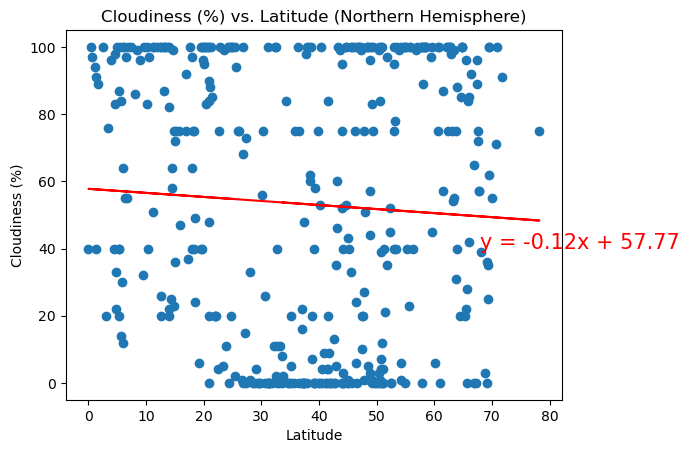

In [39]:
# Northern Hemisphere

# Define variables 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Cloudiness (%) vs. Latitude (Northern Hemisphere)")
plt.ylabel("Cloudiness (%)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (68,40), fontsize=15,color="red")

# Display graph
plt.show()

The r^2-value is: 8.953913938408051e-05


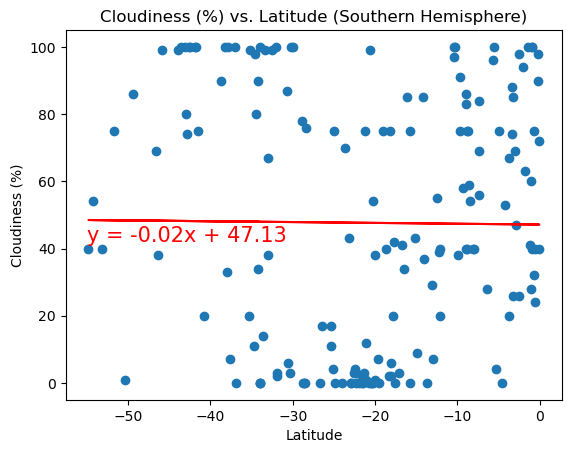

In [40]:
# Southern Hemisphere

# Define variables 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Cloudiness (%) vs. Latitude (Southern Hemisphere)")
plt.ylabel("Cloudiness (%)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55, 42), fontsize=15,color="red")

# Display graph
plt.show()

**Discussion about the linear relationship:** The above graphs illustrate that there is a very weak relationship between Cloudiness and Latitude. There is no indicator that as you move closer or further away from the equator, there will be more or fewer clouds. The r-squared value for both the Northern and Southern Hemispheres support this as well: since the r-value for both graphs is so close to 0, it inidcates that Latitude is not a reliable predictor for Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.005688077336272435


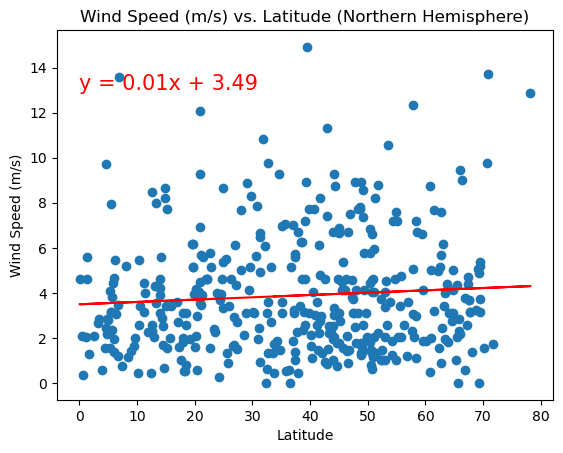

In [44]:
# Northern Hemisphere

# Define variables 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Wind Speed (m/s) vs. Latitude (Northern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,13), fontsize=15,color="red")

# Display graph
plt.show()

The r^2-value is: 0.00809873699793884


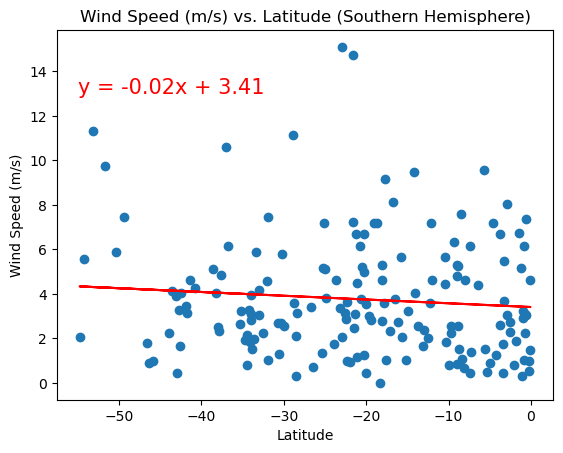

In [45]:
# Southern Hemisphere

# Define variables 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call Function 
regress_values = linear_regression(x_values, y_values)

# Add Titles
plt.title("Wind Speed (m/s) vs. Latitude (Southern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")

# Calculate regression equation and add to empty spot on graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55, 13), fontsize=15,color="red")

# Display graph
plt.show()

**Discussion about the linear relationship:** In both the Northern and the Southern Hemispheres, the Wind Speed does not change much as you go further away or closer to the equator. Both regression lines have very small slopes (Northern Hemisphere slope, rounded, = 0.0; Southern Hemisphere slope, rounded, = -0.02), showing that there is very little difference in wind speed when you do from one latitude to the next. This is further supported by the r-squared values for each graph. Both r-squared values in the two graphs above further support the notion that Latitude is a weak predictor for Wind Speed. 